In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, log_loss, jaccard_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt

### Importing the dataset

In [ ]:
df = pd.read_csv("heart.csv")

###Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Importing the libraries

In [ ]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.shape

(918, 12)

###Extracting Independent and dependenVariable

In [ ]:
y = df["HeartDisease"]

In [ ]:
x = df.drop("HeartDisease",axis=1)

In [ ]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [ ]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [ ]:
x.shape

(918, 11)

In [ ]:
y.shape

(918,)

###Convert Categorical features to numerical values

In [ ]:
x["Sex"].replace({"M":0,"F":1},inplace=True)
x["ChestPainType"].replace({"TA":0,"ATA":1,"NAP":2,"ASY":3},inplace=True)
x["RestingECG"].replace({"Normal":0,"ST":1,"LVH":2},inplace=True)
x["ExerciseAngina"].replace({"N":0,"Y":1},inplace=True)
x["ST_Slope"].replace({"Up":0,"Flat":1,"Down":2},inplace=True)

In [ ]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,1,140,289,0,0,172,0,0.0,0
1,49,1,2,160,180,0,0,156,0,1.0,1
2,37,0,1,130,283,0,1,98,0,0.0,0
3,48,1,3,138,214,0,0,108,1,1.5,1
4,54,0,2,150,195,0,0,122,0,0.0,0


In [ ]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


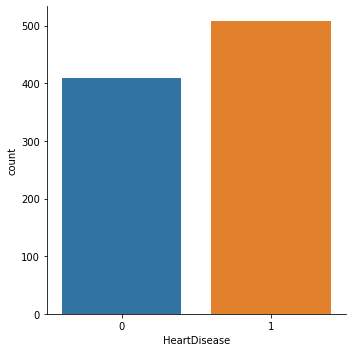

In [ ]:
sns.factorplot(x = 'HeartDisease', data =df , kind = 'count')

###Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 5)

###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)
print(x_train.shape,x_test.shape)

(688, 11) (230, 11)


In [ ]:
print(x_train[:5])

[[ 0.60045902 -0.51675428  0.77099681  0.4149379  -0.30842409 -0.51901127
  -0.72603548  0.12704755 -0.81600218 -0.80613038 -1.03544983]
 [ 0.91897545 -0.51675428 -0.29629857  0.03838977 -1.87749368  1.92674045
   0.5385529  -0.70579413  1.22548692  0.30737345  0.62513172]
 [ 1.87452474  1.9351557   0.77099681 -1.09125462 -0.4941128  -0.51901127
  -0.72603548 -0.46783936 -0.81600218  0.6785414   0.62513172]
 [ 0.60045902 -0.51675428  0.77099681 -1.1988398   0.34148639 -0.51901127
   1.80314127  0.20636581  1.22548692  0.30737345  0.62513172]
 [-0.88595098  1.9351557   0.77099681 -0.01540282  0.87998365 -0.51901127
  -0.72603548  0.28568407 -0.81600218 -0.80613038 -1.03544983]]


In [ ]:
print(x_test[:5])

[[-1.31063955 -0.51675428  0.77099681 -0.6609139   1.24207663 -0.51901127
  -0.72603548 -0.74545326  1.22548692  1.97762919  0.62513172]
 [-0.56743455 -0.51675428 -1.36359396 -1.7367657  -0.40126844 -0.51901127
  -0.72603548 -1.45931755 -0.81600218 -0.80613038 -1.03544983]
 [ 0.70663117 -0.51675428  0.77099681 -0.122988   -1.87749368  1.92674045
   0.5385529  -0.26954372  1.22548692  0.21458147  2.28571327]
 [ 1.02514759 -0.51675428  0.77099681  0.4149379   0.53645954 -0.51901127
   0.5385529  -0.98340802  1.22548692  1.97762919  0.62513172]
 [-1.20446741 -0.51675428 -0.29629857 -0.6609139   0.35077083  1.92674045
  -0.72603548  2.26864045 -0.81600218 -0.06379449  2.28571327]]


In [ ]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (688, 11) (688,)
Test set: (230, 11) (230,)


### SVM model

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

SVC()

In [ ]:
yhat = clf.predict(x_test)
yhat [0:5]

array([1, 0, 1, 1, 1])

In [ ]:
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(clf.score(x_train, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(clf.score(x_test, y_test)))


print('The jaccard_score of the SVM classifier on train data is {:.2f}'.format(jaccard_score(y_test,yhat,pos_label=1)))
print('The F1-score of the SVM classifier on train data is {:.2f}'.format(f1_score(y_test,yhat, average='weighted')))

The accuracy of the svm classifier on training data is 0.90 out of 1
The accuracy of the svm classifier on test data is 0.90 out of 1
The jaccard_score of the SVM classifier on train data is 0.84
The F1-score of the SVM classifier on train data is 0.90


In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

[[ 84  13]
 [ 11 122]]
Accuracy of our model is equal 89.57 %.


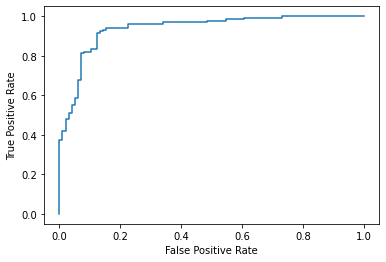

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### K-NNN model

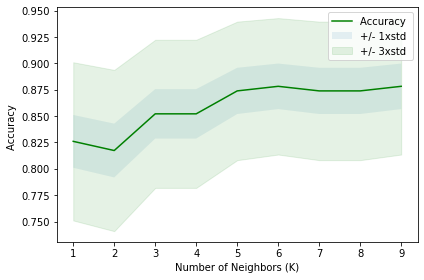

The best accuracy was with 0.8782608695652174 with k= 6


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):  
    knn1 = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=knn1.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
knn1= KNeighborsClassifier(n_neighbors = 6).fit(x_train,y_train)
print('The jaccard_score of the KNN for k = 6 classifier on train data is {:.2f}'.format(jaccard_score(yhat,y_test,pos_label=1)))
print('The F1-score of the KNN for k = 6 classifier on train data is {:.2f}'.format(f1_score(y_test, yhat, average='weighted')))
print('The Maximum cross validation score of the KNN regression classifier on train data is {:.2f}'.format(cross_val_score(knn1, x_train, y_train, cv=10, scoring='accuracy').max()))

The jaccard_score of the KNN for k = 6 classifier on train data is 0.81
The F1-score of the KNN for k = 6 classifier on train data is 0.88
The Maximum cross validation score of the KNN regression classifier on train data is 0.90


In [ ]:
y_pred = knn1.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(y_test.shape)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score (y_test, y_pred)

(230,)
[[ 87  10]
 [ 18 115]]


0.8782608695652174

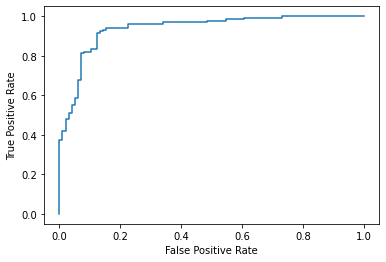

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

###Decisoin tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
classifier
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
from sklearn import metrics
predTree = classifier.predict(x_train)

print("The accuraccy of classifier DecisionTrees's {:.2f} ".format(metrics.accuracy_score(y_train, predTree)))
print('The jaccard_score of the classifier (DecisionTrees classifier) on train data is {:.2f}'.format(jaccard_score(y_train,predTree,pos_label=1)))
print('The F1-score of the classifier (DecisionTrees classifier) on train data is {:.2f}'.format(f1_score(y_train,predTree, average='weighted')))
print('The Maximum cross validation score of the classifier (DecisionTrees classifier) on train data is {:.2f}'.format(cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy').max()))

The accuraccy of classifier DecisionTrees's 0.86 
The jaccard_score of the classifier (DecisionTrees classifier) on train data is 0.79
The F1-score of the classifier (DecisionTrees classifier) on train data is 0.86
The Maximum cross validation score of the classifier (DecisionTrees classifier) on train data is 0.90


In [ ]:
predTree = classifier.predict(x_test)
print (predTree [0:5])
print (y_test [0:5])

[1 0 1 1 0]
236    1
151    0
329    1
416    1
795    0
Name: HeartDisease, dtype: int64


In [ ]:
from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_10 <= -0.21
|   |--- feature_2 <= 0.24
|   |   |--- feature_4 <= -1.41
|   |   |   |--- feature_9 <= -0.39
|   |   |   |   |--- class: 0
|   |   |   |--- feature_9 >  -0.39
|   |   |   |   |--- class: 1
|   |   |--- feature_4 >  -1.41
|   |   |   |--- feature_0 <= 0.34
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.34
|   |   |   |   |--- class: 0
|   |--- feature_2 >  0.24
|   |   |--- feature_9 <= -0.39
|   |   |   |--- feature_7 <= 0.58
|   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  0.58
|   |   |   |   |--- class: 1
|   |   |--- feature_9 >  -0.39
|   |   |   |--- feature_1 <= 0.71
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  0.71
|   |   |   |   |--- class: 0
|--- feature_10 >  -0.21
|   |--- feature_2 <= 0.24
|   |   |--- feature_7 <= 0.01
|   |   |   |--- feature_8 <= 0.20
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.20
|   |   |   |   |--- class: 1
|   |   |--- feature_7 >  0.01
|   |   |   |--- feature_10

In [ ]:
from sklearn import metrics
print("The accuraccy of classifier DecisionTrees's {:.2f} ".format(metrics.accuracy_score(y_test, predTree)))

print('The jaccard_score of the classifier DecisionTrees classifier on train data is {:.2f}'.format(jaccard_score(y_test,predTree,pos_label=1)))
print('The F1-score of the classifier DecisionTrees classifier on train data is {:.2f}'.format(f1_score(y_test,predTree, average='weighted')))

The accuraccy of classifier DecisionTrees's 0.83 
The jaccard_score of the classifier DecisionTrees classifier on train data is 0.76
The F1-score of the classifier DecisionTrees classifier on train data is 0.83


In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

[[ 68  29]
 [ 10 123]]
Accuracy of our model is equal 83.04 %.


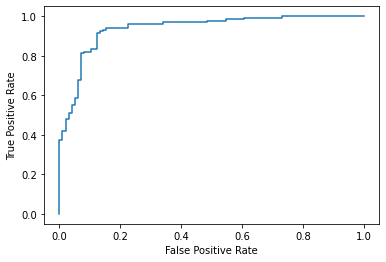

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

######Model Evaluation on Test Data

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

In [ ]:
ykp=knn1.predict(x_test)

cm = confusion_matrix(y_test,ykp)
print(cm)
accuracy = accuracy_score(y_test, ykp)
print('Accuracy of our knn on testing data is ' + str(round(accuracy, 2)))
print('The jaccard_score of the KNN (k = 6) classifier on test data is {:.2f}'.format(jaccard_score(y_test,ykp,pos_label=1)))
print('The F1-score of the KNN for k = 6 classifier on t data is {:.2f}'.format(f1_score(y_test, ykp, average='weighted')))


[[ 87  10]
 [ 18 115]]
Accuracy of our knn on testing data is 0.88
The jaccard_score of the KNN (k = 6) classifier on test data is 0.80
The F1-score of the KNN for k = 6 classifier on t data is 0.88


In [ ]:
ypt = classifier.predict(x_test)
print("The accuraccy of classier DecisionTrees's {:.2f} ".format(metrics.accuracy_score(y_test, ypt)))
print('The jaccard_score of the classfier DecisionTrees classifier on test data is {:.2f}'.format(jaccard_score(y_test,ypt,pos_label=1)))
print('The F1-score of the classfier DecisionTrees classifier on test data is {:.2f}'.format(f1_score(y_test,ypt, average='weighted')))

The accuraccy of classier DecisionTrees's 0.83 
The jaccard_score of the classfier DecisionTrees classifier on test data is 0.76
The F1-score of the classfier DecisionTrees classifier on test data is 0.83


In [ ]:
yp_svm = clf.predict(x_test)
cm = confusion_matrix(y_test,yp_svm)
print(cm)
print('The accuracy of the svm classifier on test data is {:.2f}'.format(accuracy_score(y_test, yp_svm)))
print('The jaccard_score of the SVM classifier on test data is {:.2f}'.format(jaccard_score(y_test,yp_svm,pos_label=1)))
print('The F1-score of the SVM classifier on test data is {:.2f}'.format(f1_score(y_test,yp_svm, average='weighted')))

[[ 84  13]
 [ 11 122]]
The accuracy of the svm classifier on test data is 0.90
The jaccard_score of the SVM classifier on test data is 0.84
The F1-score of the SVM classifier on test data is 0.90


In [ ]:
A1=jaccard_score(y_test,ykp,pos_label=1)
B1=f1_score(y_test,ykp, average='weighted')
C1 = accuracy_score(y_test, ykp)
D1=cross_val_score(knn1, x_train, y_train, cv=10, scoring='accuracy').max()
A2=jaccard_score(y_test,ypt,pos_label=1)
B2=f1_score(y_test,ypt, average='weighted')
C2 = accuracy_score(y_test, ypt)
D2=cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy').max()
A3=jaccard_score(y_test,yp_svm,pos_label=1)
B3=f1_score(y_test,yp_svm, average='weighted')
C3 = accuracy_score(y_test, yp_svm)
D3=cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy').max()

In [ ]:
from tabulate import tabulate

table = [['Algorithm','Jaccard','F1-score','Accuracy', "Cross Validation Score"],['KNN',A1,B1,C1,D1],['DecisionTree',A2,B2,C2,D2],['SVM',A3,B3,C3,D3]]

print(tabulate(table, headers='firstrow'))

Algorithm       Jaccard    F1-score    Accuracy    Cross Validation Score
------------  ---------  ----------  ----------  ------------------------
KNN            0.804196    0.878784    0.878261                  0.898551
DecisionTree   0.759259    0.826882    0.830435                  0.897059
SVM            0.835616    0.895498    0.895652                  0.913043


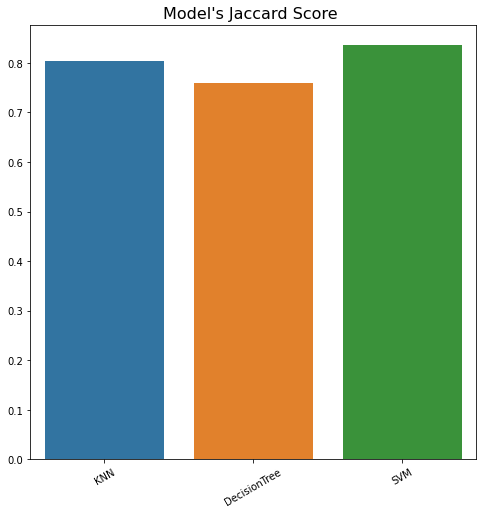

In [ ]:
models = [A1, A2, A3]

plt.figure(figsize=(8,8))
sns.barplot(x=[ "KNN","DecisionTree","SVM",], y=models)
plt.title("Model's Jaccard Score ", size=16)
plt.xticks(rotation=30)
plt.show()

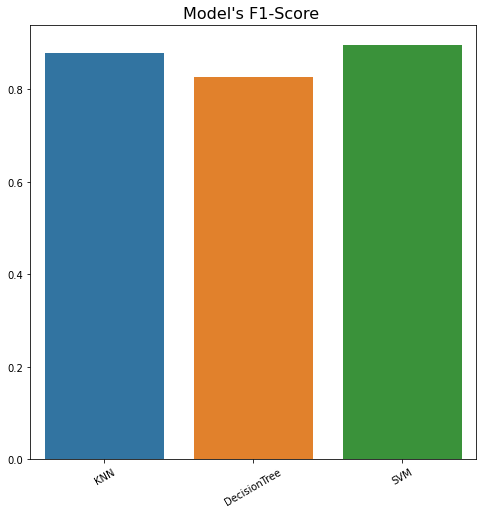

In [ ]:
models = [B1, B2, B3]

plt.figure(figsize=(8,8))
sns.barplot(x=["KNN","DecisionTree","SVM",], y=models)
plt.title("Model's F1-Score ", size=16)
plt.xticks(rotation=30)
plt.show()

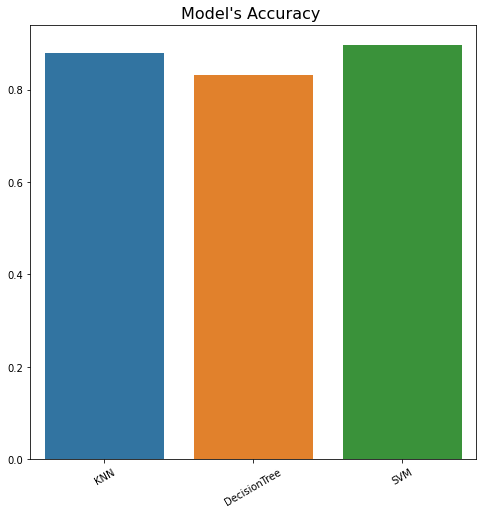

In [ ]:
models = [C1, C2, C3]

plt.figure(figsize=(8,8))
sns.barplot(x=["KNN","DecisionTree","SVM",], y=models)
plt.title("Model's Accuracy ", size=16)
plt.xticks(rotation=30)
plt.show()

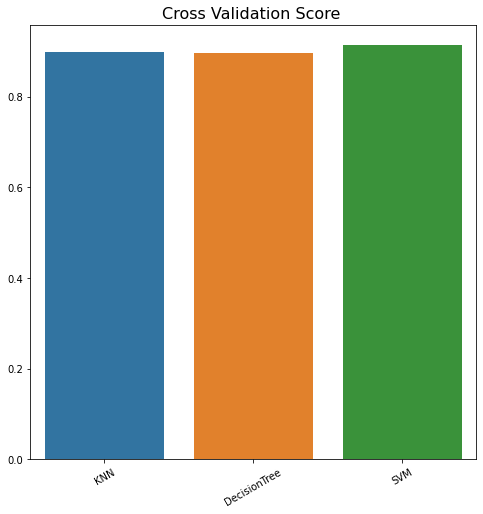

In [ ]:
models = [D1,D2,D3]

plt.figure(figsize=(8,8))
sns.barplot(x=["KNN","DecisionTree","SVM",], y=models)
plt.title("Cross Validation Score ", size=16)
plt.xticks(rotation=30)
plt.show()